In [1]:
import os
from datasets import Dataset
from ragas import evaluate
from ragas.metrics import (
    context_precision,
    context_recall,
    faithfulness,
    answer_relevancy,
)
from rag import RAGAgent

test_samples = [
    {   
        "question": "What was Apple’s revenue in Q1 2024?",
        "ground_truth": "$119.58 billion"
        },
    {
        "question": "What earnings per share (EPS) did Apple report for the December 2024 quarter?",
        "ground_truth": "$2.18"
    },
       {
        "question": "What was Apple’s net income for the December 2024 quarter?",
        "ground_truth": "$33.9 billion"
    },
        {
        "question": "What guidance did Apple give for company gross margin in the March 2024 quarter?",
        "ground_truth": "between 46% and 47%"
    },
    {
        "question": "What were Apple’s total assets at September 28, 2024?",
        "ground_truth": "$364.98 billion" 
    },
    {
        "question": "What dividend per share did Apple declare in fiscal year 2024?",
        "ground_truth": "$0.25 per share or RSU" 
    },
        {
        "question": "What was Apple’s net income for fiscal year 2024?",
        "ground_truth": "$93.7 billion"  
    },
    {
        "question": "What was Apple’s basic earnings per share for fiscal year 2024?",
        "ground_truth": "$6.11" 
    },
    {
        "question": "What was Apple’s diluted earnings per share for fiscal year 2024?",
        "ground_truth": "$6.08"  
    },
        {
        "question": "How much did Apple spend on repurchasing its common stock in fiscal year 2024?",
        "ground_truth": "$95.8 billion"
    },

]

In [ ]:
from dotenv import load_dotenv
load_dotenv()
agent = RAGAgent(model_name="gpt-4o")

dataset_dict = {"question": [], "ground_truth": [], "contexts": [], "answer": []}

for sample in test_samples:
    q = sample["question"]
    gt = sample["ground_truth"]

    out = agent.process_query(q)
    contexts = [d["content"] for d in out["source_documents"]]

    dataset_dict["question"].append(q)
    dataset_dict["ground_truth"].append(gt)
    dataset_dict["contexts"].append(contexts)
    dataset_dict["answer"].append(out["response"])

dataset = Dataset.from_dict(dataset_dict)

result = evaluate(
    dataset=dataset,
    metrics=[
        context_precision,
        context_recall,
        faithfulness,
        answer_relevancy,
    ],
)

df = result.to_pandas()
print(df)

Collection selected: aapl_10k_10q_forms
Collection selected: earnings_calls
Collection selected: aapl_10k_10q_forms
Collection selected: earnings_calls
Collection selected: aapl_10k_10q_forms
Collection selected: aapl_10k_10q_forms
Collection selected: aapl_10k_10q_forms
Collection selected: aapl_10k_10q_forms


Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

                                          user_input  \
0               What was Apple’s revenue in Q1 2024?   
1  What earnings per share (EPS) did Apple report...   
2  What was Apple’s net income for the December q...   
3  What guidance did Apple give for company gross...   
4  What were Apple’s total assets at September 28...   
5  What dividend per share did Apple declare in f...   
6  What was Apple’s net income for fiscal year 2024?   
7  What was Apple’s basic earnings per share for ...   
8  What was Apple’s diluted earnings per share fo...   
9  How much did Apple spend on repurchasing its c...   

                                  retrieved_contexts  \
0  [, 2023 (the “2023 Form 10-K”).\nThe Company’s...   
1  [n additional week in the\nquarter. And second...   
2  [ment for the three- and six-month periods end...   
3  [l turn it over to Luca.\nLuca Maestri\nThank ...   
4  [s, and par value)\nMarch 30,\n2024\nSeptember...   
5                                              

In [ ]:
import pandas as pd
from IPython.display import display

csv_path = "/home/sarahgohrazer/Projects/Stocks-MultiAgent/output/apple_rag_results.csv"
df = pd.read_csv(csv_path)
display(df)

,user_input,retrieved_contexts,response,reference,context_precision,context_recall,faithfulness,answer_relevancy
0,What was Apple’s revenue in Q1 2024? Just give...,"[', 2023 (the “2023 Form 10-K”).\nThe Company’...","Apple's revenue for Q1 2024 was $90,753 millio...","$90,753 million",1.0,1.000000,0.666667,0.929108
1,What was Apple's total revenue in Q2 2024? Jus...,"[',836\n(4)\n%\n$\n210,328\n$\n211,990\n(1)\n%...","Apple's total revenue in Q2 2024 was $90,753 m...","$90,753 million",0.0,0.000000,0.000000,0.940728
2,Which product category had the highest net sal...,"[',836\n(4)\n%\n$\n210,328\n$\n211,990\n(1)\n%...",Based on the retrieved information from the Ap...,"Services, 23867 million",1.0,0.000000,0.111111,0.933482
3,What was Apple’s diluted earnings per share in...,['Sales of Equity Securities and Use of Procee...,Apple's diluted earnings per share in fiscal Q...,$1.53 per share,1.0,1.000000,0.750000,0.945204
4,What was Apple's net sales by reportable segme...,['ften declines as the launch of a newer produ...,Based on the retrieved documents from Apple's ...,"Americas: $167,045, Europe: $101,328, Greater ...",1.0,0.000000,0.444444,0.983378
5,What was Apple's net sales by category for 2024?,"[',836\n(4)\n%\n$\n210,328\n$\n211,990\n(1)\n%...",Based on the retrieved documents from Apple's ...,"iphone: $201,183, Mac: $29,984, ipad: 26,694, ...",1.0,0.000000,0.357143,0.997383
6,What was better than expected in the quarter f...,"[""uca. We ask that you limit yourself to two q...","In the December quarter, Apple's services segm...","In services, we've seen a very strong performa...",1.0,0.833333,0.619048,0.855152
7,"In earnings call, what were the drivers of App...","[""this year into next year? Thanks.\n29/03/202...","In the Q2 2024 earnings call, Apple reported a...",The acceleration was driven by all‑time record...,1.0,1.000000,0.736842,0.000000
8,What early feedback did Apple receive on Apple...,"["" TD Cowen. Please go ahead.\nKrish Sankar\nY...","The early feedback on Apple Intelligence, as d...",Within the first three days of the iOS 18.1 la...,0.0,0.000000,0.200000,0.000000
9,"From earnings call, could Apple’s combined rev...","[""bviously, there's\ngoing to be a number of c...",Based on the retrieved information from Apple'...,"China remains Apple’s largest emerging market,...",1.0,1.000000,0.352941,0.000000


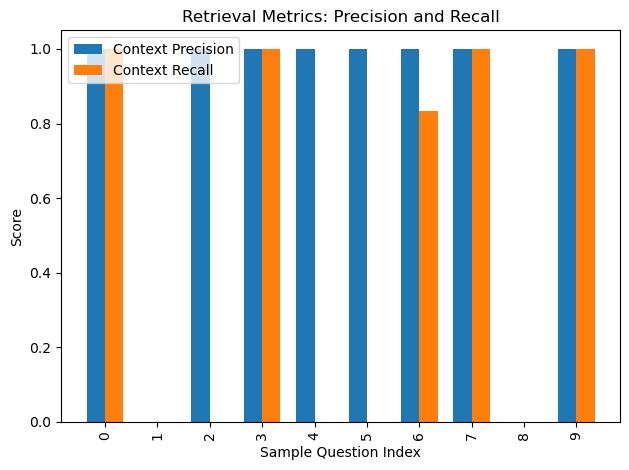

In [19]:
import matplotlib.pyplot as plt

x = range(len(df))
labels = df.index

# 1) Retrieval Phase: Precision & Recall
width = 0.35
plt.figure()
plt.bar([i - width/2 for i in x], df['context_precision'], width=width, label='Context Precision')
plt.bar([i + width/2 for i in x], df['context_recall'], width=width, label='Context Recall')
plt.xticks(x, labels, rotation=90)
plt.xlabel('Sample Question Index')
plt.ylabel('Score')
plt.title('Retrieval Metrics: Precision and Recall')
plt.legend()
plt.tight_layout()
plt.show()

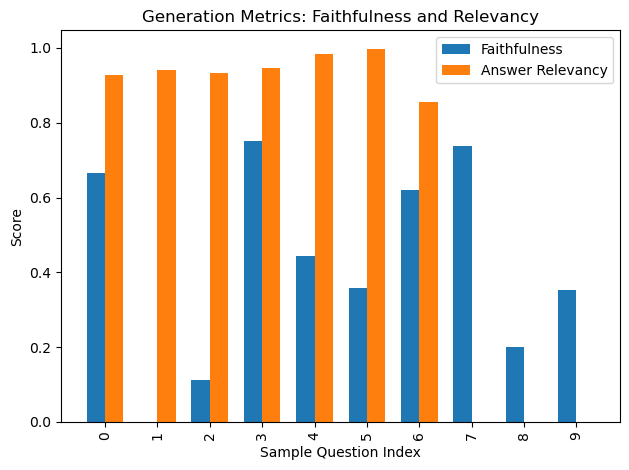

In [20]:
plt.figure()
plt.bar([i - width/2 for i in x], df['faithfulness'], width=width, label='Faithfulness')
plt.bar([i + width/2 for i in x], df['answer_relevancy'], width=width, label='Answer Relevancy')
plt.xticks(x, labels, rotation=90)
plt.xlabel('Sample Question Index')
plt.ylabel('Score')
plt.title('Generation Metrics: Faithfulness and Relevancy')
plt.legend()
plt.tight_layout()
plt.show()

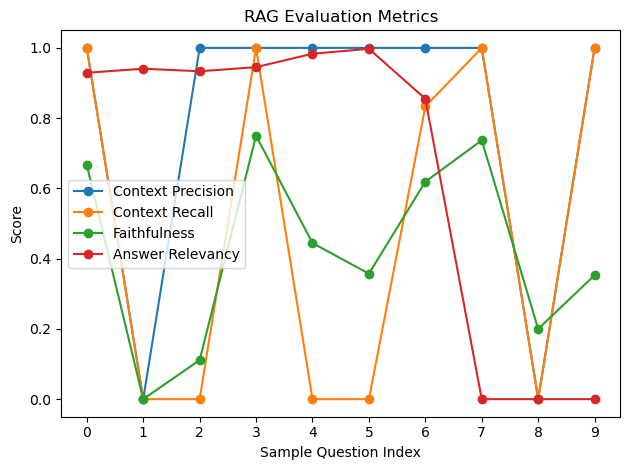

In [24]:
metrics = ["context_precision", "context_recall", "faithfulness", "answer_relevancy"]

plt.figure()
for metric in metrics:
    plt.plot(df.index, df[metric], marker='o', label=metric.replace('_', ' ').title())

plt.xticks(x, labels)
plt.xlabel("Sample Question Index")
plt.ylabel("Score")
plt.title("RAG Evaluation Metrics")
plt.legend()
plt.tight_layout()
plt.show()

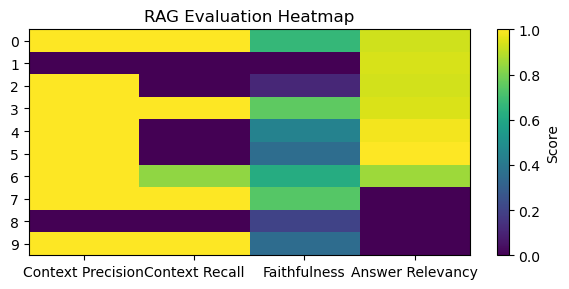

In [25]:
metrics = ["context_precision", "context_recall", "faithfulness", "answer_relevancy"]
Z = df[metrics].values  # shape: [n_samples, 4]

plt.figure(figsize=(6, len(df) * 0.3))
plt.imshow(Z, aspect="auto", cmap="viridis", vmin=0, vmax=1)
plt.colorbar(label="Score")
plt.yticks(range(len(df)), df.index)
plt.xticks(range(len(metrics)), [m.replace("_", " ").title() for m in metrics])
plt.title("RAG Evaluation Heatmap")
plt.tight_layout()
plt.show()

In [26]:
metrics = [
    "context_precision",
    "context_recall",
    "faithfulness",
    "answer_relevancy",
]

# Compute the average for each
avg_scores = df[metrics].mean()

# Display as a simple table
print(avg_scores.to_frame(name="Average Score"))

                   Average Score
context_precision       0.800000
context_recall          0.483333
faithfulness            0.423820
answer_relevancy        0.658444


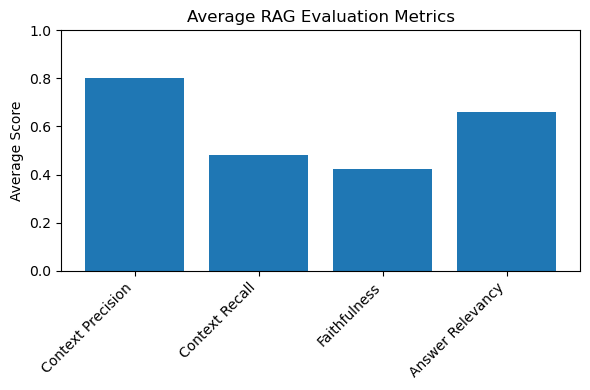

In [27]:
metrics = ["context_precision", "context_recall", "faithfulness", "answer_relevancy"]
avg_scores = df[metrics].mean()

# Plot the average scores
plt.figure(figsize=(6, 4))
plt.bar(
    [m.replace('_', ' ').title() for m in avg_scores.index],
    avg_scores.values
)
plt.ylabel("Average Score")
plt.ylim(0, 1)
plt.title("Average RAG Evaluation Metrics")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()